Shape of training set: x: (60000, 28, 28)
Shape of training set: y: (60000,)
Training set size: 60000
Test set size: 10000


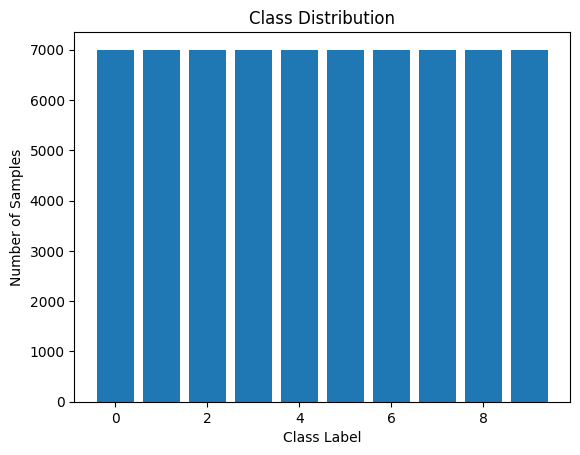

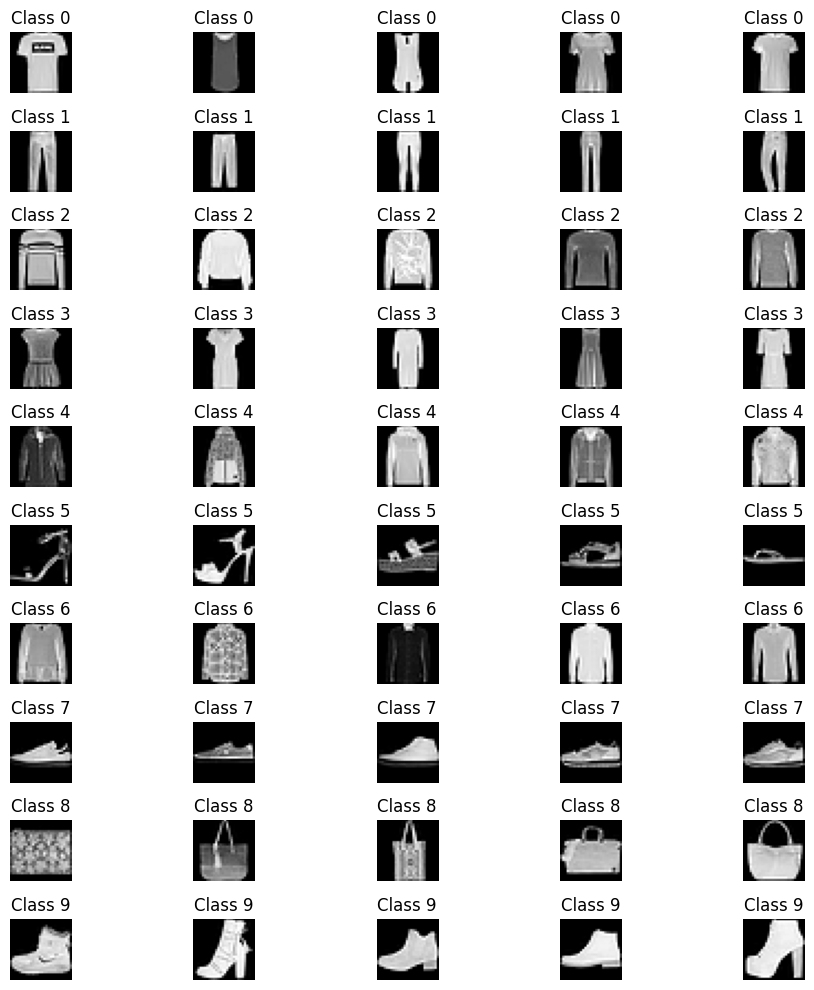

In [1]:
# Step 1: Data Exploration
from classification import Classification
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import datasets, layers, models
import tensorflow as tf



(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
cf = Classification(x_train,y_train,x_test,y_test)

# Print dataset size
cf.get_sizes()

# Show class distribution
cf.plot_class_distribution()

# Plot a few samples of each class
cf.plot_samples(5)



In [2]:
# Step 2: Pre-processing

# Set random seed for reproducibility
cf.set_seed(36)

# Split the training data into training and validation sets
cf.split_to_val(0.2)

# Normalize the data
cf.normalize_data()

# Convert class vectors to binary class matrices
cf.convert_to_binary_class_matrices(10)


In [4]:
# Step 3: Define Initial Model

cf.define_model(models.Sequential())

cf.add_to_model(layers.Input(shape=(28, 28, 1)))
cf.add_to_model(layers.Conv2D(32, (3, 3), activation='relu'))
cf.add_to_model(layers.MaxPooling2D((2, 2)))
cf.add_to_model(layers.Conv2D(64, (3, 3), activation='relu'))
cf.add_to_model(layers.MaxPooling2D((2, 2)))
cf.add_to_model(layers.Conv2D(64, (3, 3), activation='relu'))
cf.add_to_model(layers.Flatten())
cf.add_to_model(layers.Dense(64, activation='relu'))
cf.add_to_model(layers.Dense(10, activation='softmax'))

cf.set_hyperparameters(epochs = 10,batch_size = 64)

# Print the model summary
cf.print_summary()
cf.print_hyperparameters()

# Define hyperparameters
cf.compile_model('adam',tf.keras.losses.CategoricalCrossentropy(),'accuracy')



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

{'epochs': 10, 'batch_size': 64}


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6983 - loss: 0.8263 - val_accuracy: 0.8503 - val_loss: 0.4122
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8684 - loss: 0.3646 - val_accuracy: 0.8804 - val_loss: 0.3307
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8840 - loss: 0.3169 - val_accuracy: 0.8802 - val_loss: 0.3295
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8986 - loss: 0.2764 - val_accuracy: 0.8956 - val_loss: 0.2826
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9086 - loss: 0.2508 - val_accuracy: 0.9007 - val_loss: 0.2792
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9172 - loss: 0.2261 - val_accuracy: 0.9045 - val_loss: 0.2624
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9232 - loss: 0.2059 - val_accuracy: 0.8964 - val_loss: 0.2784
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9288 - loss: 0.1915 - val_ac

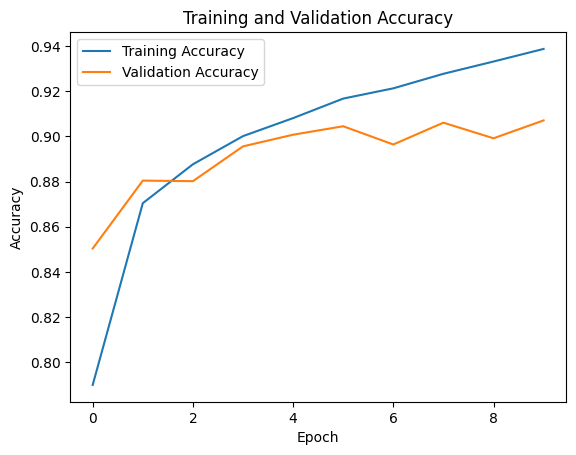

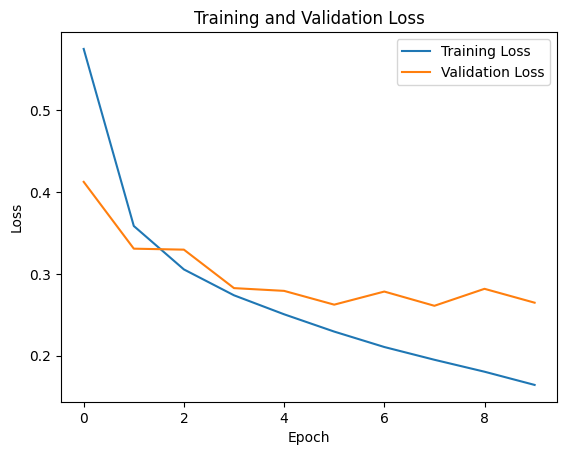

In [5]:
# Step 4: Train the Model

# Train the model
cf.train_model()

# Plot training and validation curves
cf.plot_training_and_validation_curves()



In [25]:
# Step 5: Hyperparameter Tuning

# Define different hyperparameters to tune
batch_sizes_list = [32, 64, 128]
epochs_list = [10, 20, 30]
optimizers_list = ['adam', 'sgd']
loss_list = [tf.keras.losses.CategoricalCrossentropy()]

cf.init_hyperparameter_tuning(batch_sizes_list,epochs_list,optimizers_list,loss_list)

cf.tune_hyperparameters("hyperparameter_tuning.csv")



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7226 - loss: 0.7432 - val_accuracy: 0.8650 - val_loss: 0.3772
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8691 - loss: 0.3582 - val_accuracy: 0.8784 - val_loss: 0.3315
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8923 - loss: 0.2989 - val_accuracy: 0.8719 - val_loss: 0.3431
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9014 - loss: 0.2675 - val_accuracy: 0.9025 - val_loss: 0.2695
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9125 - loss: 0.2397 - val_accuracy: 0.8976 - val_loss: 0.2733
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9202 - loss: 0.2125 - val_accuracy: 0.9068 - val_loss: 0.2571
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9295 - loss: 0.1897 - val_accuracy: 0.9035 - val_loss: 0.2632
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9349 - loss: 0.17

In [6]:
# Step 6: Test Final Model
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

cf_2 = Classification(x_train,y_train,x_test,y_test)


cf_2.set_seed(36)
cf_2.split_to_val(None)
cf_2.normalize_data()
cf_2.convert_to_binary_class_matrices(10)

cf_2.define_model(models.Sequential())
cf_2.add_to_model(layers.Input(shape=(28, 28, 1)))
cf_2.add_to_model(layers.Conv2D(32, (3, 3), activation='relu'))
cf_2.add_to_model(layers.MaxPooling2D((2, 2)))
cf_2.add_to_model(layers.Conv2D(64, (3, 3), activation='relu'))
cf_2.add_to_model(layers.MaxPooling2D((2, 2)))
cf_2.add_to_model(layers.Conv2D(64, (3, 3), activation='relu'))
cf_2.add_to_model(layers.Flatten())
cf_2.add_to_model(layers.Dense(64, activation='relu'))
cf_2.add_to_model(layers.Dense(10, activation='softmax'))

# Best hyperparameters, concluded by hyperparameter tuning
cf_2.set_hyperparameters(epochs = 1,batch_size = 32)

cf_2.print_summary()
cf_2.print_hyperparameters()

cf_2.compile_model('adam',tf.keras.losses.CategoricalCrossentropy(),'accuracy')

cf_2.train_model()

# Evaluate the final model on the test dataset
test_loss, test_accuracy = cf_2.evaluate_model()
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the final model's weights
cf_2.save_model('final_model_weights.weights.h5')
cf_2.dump_to_yaml('final_model_config.yaml')


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

{'epochs': 1, 'batch_size': 32}
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7102 - loss: 0.7801 - val_accuracy: 0.8622 - val_loss: 0.3804
Test Loss: 0.4014
Test Accuracy: 0.8499


Loaded Model Test Loss: 0.4014
Loaded Model Test Accuracy: 0.8499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


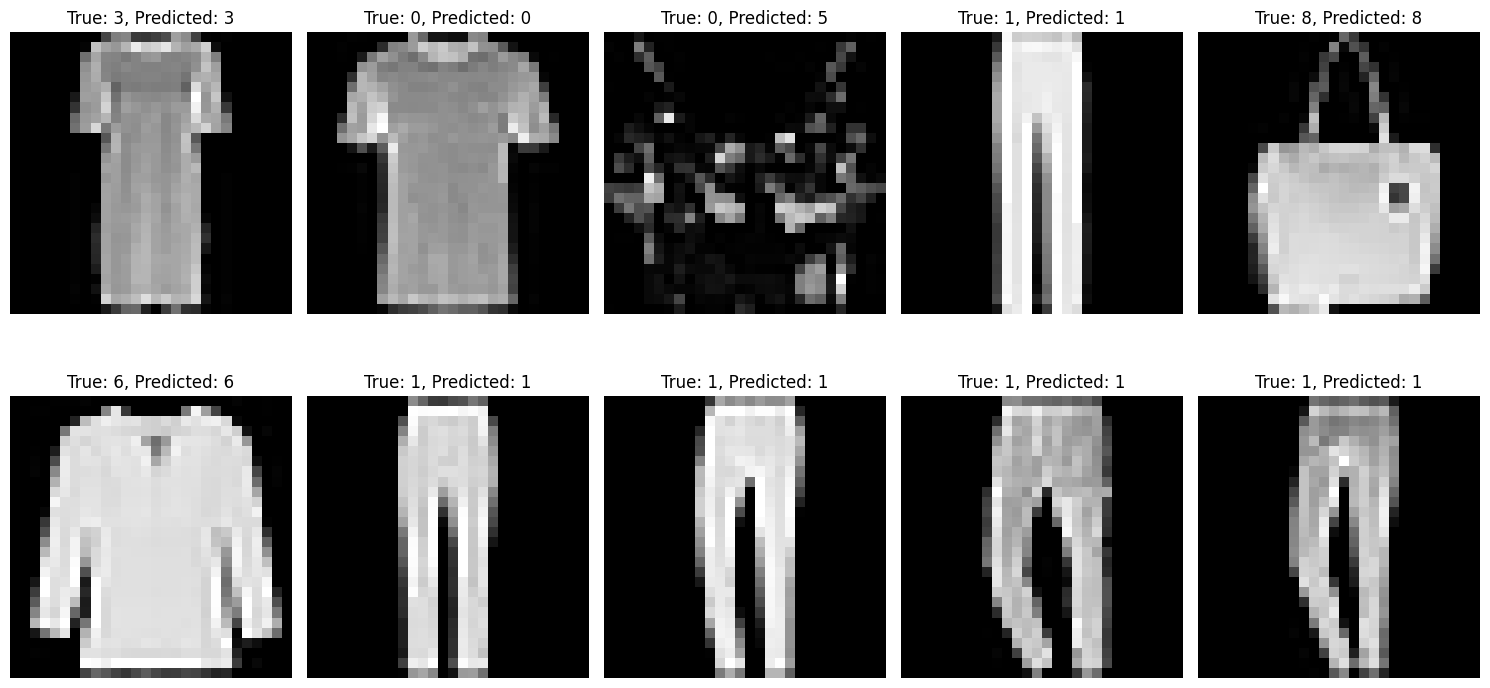

In [7]:
# Step 7: Load Configuration and Rebuild Model

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

cf_3 = Classification(x_train,y_train,x_test,y_test)


cf_3.set_seed(36)
cf_3.split_to_val(None)
cf_3.normalize_data()
cf_3.convert_to_binary_class_matrices(10)

cf_3.load_config(models.Sequential(),'final_model_weights.weights.h5',
                 'final_model_config.yaml')

cf_3.compile_model('adam',tf.keras.losses.CategoricalCrossentropy(),'accuracy')

# Evaluate the loaded model on the test dataset
loaded_model_test_loss, loaded_model_test_accuracy = cf_3.evaluate_model()
print(f"Loaded Model Test Loss: {loaded_model_test_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_model_test_accuracy:.4f}")

cf_3.plot_random_samples(10)